In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [47]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [11]:
loaded  = np.load('data/shapes.npz')
images = loaded['images']/255
labels = loaded['labels'][:,0].astype(int)-2

In [13]:
training = 0.9
len_train = int(training*len(images))

train_images = images[:len_train]
train_labels = labels[:len_train]
test_images = images[len_train:]
test_labels = labels[len_train:]

len_train = int(training*len(train_images))
val_images = train_images[len_train:]
val_labels = train_labels[len_train:]
train_images = train_images[:len_train]
train_labels = train_labels[:len_train]


In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=images[0].shape),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 361)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               181000    
                                                                 
 dense_9 (Dense)             (None, 400)               200400    
                                                                 
 dense_10 (Dense)            (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 3)                 603       
                                                                 
Total params: 462,203
Trainable params: 462,203
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(x=train_images, y=train_labels, epochs=30, batch_size=128,validation_data=(val_images, val_labels))

Epoch 1/30
633/633 [==============================] - 9s 13ms/step - loss: 0.8215 - accuracy: 0.5772 - val_loss: 0.7571 - val_accuracy: 0.6614
Epoch 2/30
633/633 [==============================] - 9s 14ms/step - loss: 0.4268 - accuracy: 0.8076 - val_loss: 0.3369 - val_accuracy: 0.8590
Epoch 3/30
633/633 [==============================] - 10s 15ms/step - loss: 0.2961 - accuracy: 0.8807 - val_loss: 0.2833 - val_accuracy: 0.8856
Epoch 4/30
633/633 [==============================] - 10s 15ms/step - loss: 0.2680 - accuracy: 0.8941 - val_loss: 0.1991 - val_accuracy: 0.9248
Epoch 5/30
633/633 [==============================] - 10s 16ms/step - loss: 0.2479 - accuracy: 0.9049 - val_loss: 0.2920 - val_accuracy: 0.8840
Epoch 6/30
633/633 [==============================] - 10s 15ms/step - loss: 0.2258 - accuracy: 0.9136 - val_loss: 0.2236 - val_accuracy: 0.9176
Epoch 7/30
633/633 [==============================] - 10s 15ms/step - loss: 0.2314 - accuracy: 0.9105 - val_loss: 0.2874 - val_accuracy: 0

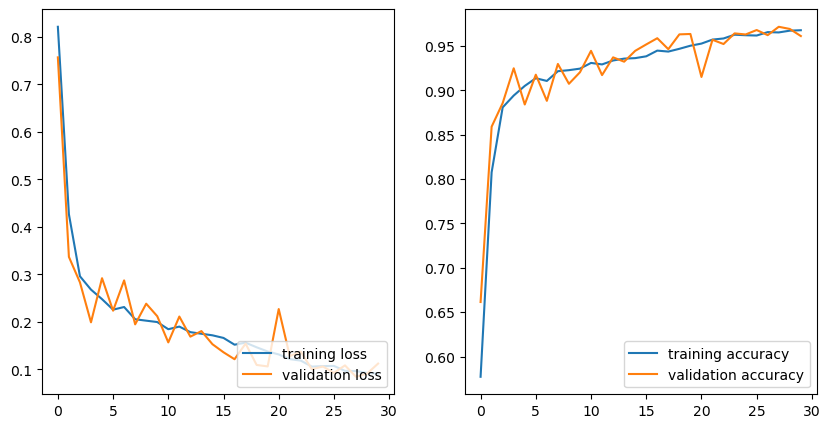

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [21]:
train_acc = model.evaluate(train_images, train_labels, batch_size=128)
test_acc= model.evaluate(test_images, test_labels, batch_size=128)

print("training accuracy : %.3f" % (train_acc[1]))
print("test accuracy : %.3f" % (test_acc[1]))

79/79 [==============================] - 1s 7ms/step - loss: 0.1061 - accuracy: 0.9638
training accuracy : 0.966
test accuracy : 0.964


In [22]:
pred = model.predict(test_images, batch_size=128)

79/79 [==============================] - 1s 6ms/step


In [38]:
labels_pred = np.argmax(pred,1)
wrong_pred = np.not_equal(labels_pred,test_labels)

In [83]:
img_wrong = test_images[wrong_pred]
lbs_wrong = labels_pred[wrong_pred]
img_show = (6,6)
img_size = len(images[0])

details = np.zeros((1+(img_size+1)*img_show[0],1+(img_size+1)*img_show[1]))

for i, s in enumerate(img_wrong[:img_show[0]*img_show[1]]):
    x = i//img_show[1]
    y = i%img_show[1]
    details[1+(img_size+1)*x:1+(img_size+1)*x+img_size,1+(img_size+1)*y:1+(img_size+1)*y+img_size] = s

fig = plt.figure(figsize=details.shape,dpi=1)
fig.figimage(details, cmap='gray')
fig.savefig('data/tmp_details.png')

<Figure size 121x121 with 0 Axes>

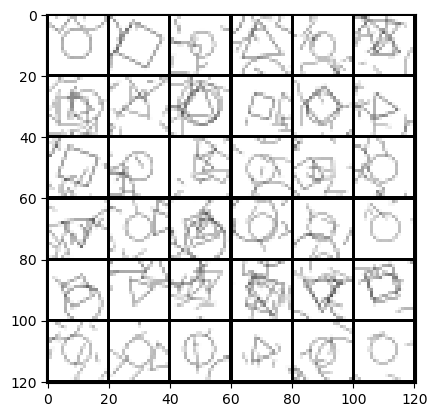

In [84]:
plt.imshow(mpimg.imread('data/tmp_details.png'))

In [74]:
details.shape

(81, 61)